In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost
import matplotlib

In [86]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_94ed119d43d74be181f25395621dad83 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='CTqjZnb8t-FzdNe7cuxrpaH8vsNu3nPFw8YYjPkpCSWQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_94ed119d43d74be181f25395621dad83.get_object(Bucket='trafficvolumeestimation-donotdelete-pr-8eubqlilzndmrz',Key='traffic volume.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Data = pd.read_csv(body)
Data.head()


,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [87]:
Data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [88]:
Data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [89]:
Data.shape

(48204, 8)

In [90]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [91]:
#dealing with missing values

Data.isnull().sum()

holiday            0
temp              53
rain               2
snow              12
weather           49
date               0
Time               0
traffic_volume     0
dtype: int64

In [92]:
Data.dtypes

holiday            object
temp              float64
rain              float64
snow              float64
weather            object
date               object
Time               object
traffic_volume      int64
dtype: object

In [93]:
from collections import Counter

In [94]:
print(Counter(Data['rain']))
print(Counter(Data['snow']))

Counter({0.0: 44735, 0.25: 948, 0.51: 256, 1.02: 123, 0.3: 121, 0.76: 109, 0.38: 99, 1.78: 91, 1.52: 69, 0.64: 55, 1.27: 50, 0.6: 32, 2.79: 29, 0.44: 26, 0.89: 25, 2.54: 23, 0.28: 23, 0.42: 21, 1.4: 21, 0.34: 20, 2.16: 19, 2.29: 19, 2.03: 19, 1.8: 16, 1.09: 16, 3.05: 15, 0.32: 15, 1.2: 15, 0.9: 15, 0.98: 14, 0.68: 13, 0.81: 13, 4.57: 13, 7.11: 12, 0.85: 12, 0.7: 11, 2.1: 11, 0.55: 11, 5.59: 10, 1.86: 10, 8.4: 10, 1.15: 10, 0.47: 9, 5.08: 9, 1.21: 9, 0.43: 9, 6.1: 9, 5.84: 8, 1.66: 8, 0.79: 8, 0.4: 8, 1.14: 8, 2.2: 8, 1.85: 8, 2.41: 8, 3.3: 8, 1.41: 7, 6.6: 7, 0.35: 7, 1.91: 7, 0.52: 7, 1.3: 7, 0.8: 7, 0.66: 7, 2.67: 7, 1.33: 7, 1.1: 7, 4.06: 7, 0.57: 6, 0.29: 6, 0.36: 6, 1.0: 6, 1.44: 6, 8.64: 6, 1.35: 6, 5.97: 6, 0.56: 6, 0.91: 6, 0.54: 6, 0.94: 6, 0.96: 6, 2.86: 6, 0.78: 6, 2.22: 6, 6.35: 6, 4.89: 6, 0.93: 6, 3.13: 6, 0.63: 6, 2.62: 6, 1.6: 6, 4.74: 6, 2.76: 6, 3.45: 6, 0.69: 5, 3.18: 5, 0.61: 5, 5.42: 5, 1.39: 5, 0.53: 5, 0.48: 5, 0.59: 5, 0.71: 5, 0.27: 5, 2.85: 5, 0.65: 5, 1.5: 5,

In [95]:
Data['temp'].fillna(Data['temp'].mean(),inplace=True)
Data['rain'].fillna(Data['rain'].mean(),inplace=True)
Data['snow'].fillna(Data['snow'].mean(),inplace=True)

In [96]:
print(Counter(Data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [97]:
Data['weather'].fillna('Clouds',inplace=True)

In [98]:
Data.isnull().sum()

holiday           0
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64

In [99]:
#Datavisualization
Data.corr()

,temp,rain,snow,traffic_volume
temp,1.000000,0.009070,-0.019758,0.130034
rain,0.009070,1.000000,-0.000090,0.004714
snow,-0.019758,-0.000090,1.000000,0.000735
traffic_volume,0.130034,0.004714,0.000735,1.000000


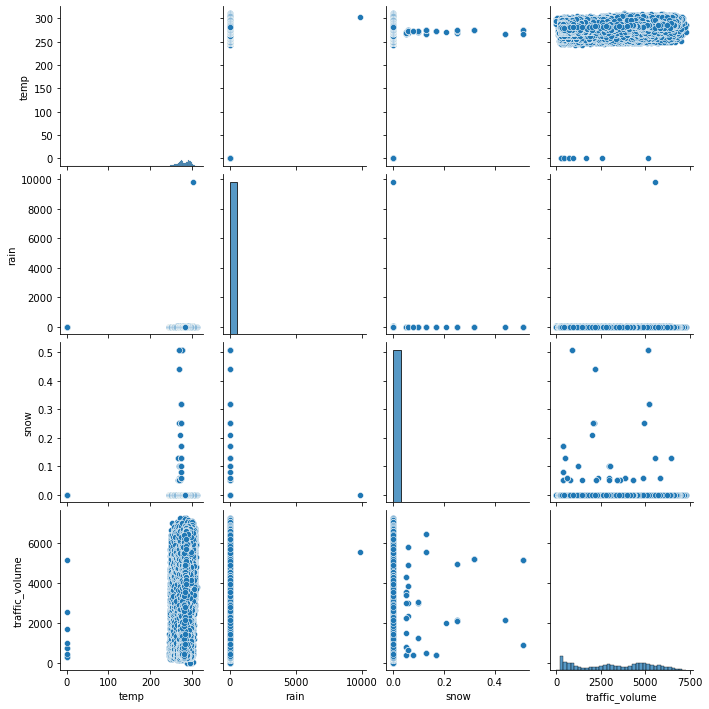

In [100]:
sns.pairplot(Data)

<AxesSubplot:>

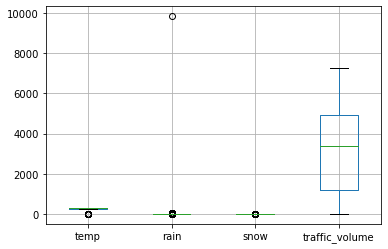

In [101]:
Data.boxplot()

In [102]:
#ENCODING THE DATA
from sklearn.preprocessing import LabelEncoder

In [103]:
le = LabelEncoder()

In [104]:
Data['weather'] = le.fit_transform(Data['weather'])

In [105]:
Data['holiday'] = le.fit_transform(Data['holiday'])

In [106]:
Data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,7,288.28,0.0,0.0,1,02-10-2012,09:00:00,5545
1,7,289.36,0.0,0.0,1,02-10-2012,10:00:00,4516
2,7,289.58,0.0,0.0,1,02-10-2012,11:00:00,4767
3,7,290.13,0.0,0.0,1,02-10-2012,12:00:00,5026
4,7,291.14,0.0,0.0,1,02-10-2012,13:00:00,4918


In [107]:
# spliiting the date column into year,month,day
Data[["day", "month", "year"]] = Data["date"].str.split("-", expand = True)

In [108]:
Data[["hours","minutes","seconds"]]=Data["Time"].str.split(":",expand=True)

In [109]:
Data.drop(columns=['date','Time'],axis=1,inplace=True)

In [110]:
Data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,7,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,7,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,7,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,7,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,7,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [111]:
#splitting the dataset into dependent and independent variable
y = Data['traffic_volume']
x = Data.drop(columns=['traffic_volume'],axis=1)

In [112]:
names = x.columns

In [113]:
from sklearn.preprocessing import scale

In [114]:
x = scale(x)

In [115]:
x  = pd.DataFrame(x,columns=names)

In [116]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [117]:
#splitting the data into train and set
    
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [119]:
#MODEL BUILDING

In [120]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [121]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [122]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=56, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [123]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [124]:
#model evaluation
from sklearn import metrics

In [125]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.517285423636859
1.0
0.9749523795479305
-12.188104231382276
0.8349874938269883


In [126]:
#with testing data finding the rscore
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5=XGB.predict(x_test)

In [127]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-5.399396398322174
0.6901087479546149
0.8028755245180301
-11.972215715232423
0.7922184852381723


In [128]:
MSE = metrics.mean_squared_error(p3,y_test)

In [129]:
np.sqrt(MSE)

799.1221575230733

In [130]:
#import pickle

In [131]:
#pickle.dump(Rand,open("model.pkl",'wb'))
#pickle.dump(le,open("encoder.pkl",'wb'))

In [132]:
#Data1 = pd.read_csv(r"C:\traffic volume.csv")

In [133]:
#print(Data1['holiday'].unique())
#print(Data['holiday'].unique())

In [134]:
#random forest giving more accuracy


In [135]:
#pred = Rand.predict(x_test)

In [136]:
#metrics.r2_score(pred,y_test)

In [137]:
import ibm_watson_machine_learning

In [138]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [139]:
#Authenticating and setting up the space

In [140]:
wml_credentials={
    "apikey":"CFtoukqMekTSo5_7T5ma41wXlj4c1WDqwDwcbGMQi776",
    "url" : "https://us-south.ml.cloud.ibm.com"
}

In [141]:
wml_client=APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------  ------------------------
ID                                    NAME            CREATED
da7843ff-c9bd-4be6-b5b6-0d445d8edace  Traffic volume  2022-03-07T15:18:54.900Z
------------------------------------  --------------  ------------------------


In [142]:
SPACE_ID="da7843ff-c9bd-4be6-b5b6-0d445d8edace"

In [143]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [144]:
MODEL_NAME="Traffic volume Estimation"
DEPLOYMENT_NAME="Traffic deployment"
BEST_MODEL=Rand

In [145]:
software_spec_uid=wml_client.software_specifications.get_id_by_name("default_py3.8")
model_props={
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
    
}

In [146]:
model_details=wml_client.repository.store_model(
model=BEST_MODEL,
meta_props=model_props,
training_data=x_train,
training_target=y_train,
)

In [147]:
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [148]:
model_uid=wml_client.repository.get_model_id(model_details)

In [149]:
model_uid

'30b2f200-8ee1-46c6-bdf3-3bff63c2ca5a'

In [150]:
deployment_props ={
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
    
}

In [151]:
deployment=wml_client.deployments.create(artifact_uid=model_uid,meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: '30b2f200-8ee1-46c6-bdf3-3bff63c2ca5a' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.
.
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='d5cd95c2-18b6-4c07-adc0-f66c37de956c'
------------------------------------------------------------------------------------------------




In [152]:
deployment_uid=wml_client.deployments.get_uid(deployment)
deployment_uid

'd5cd95c2-18b6-4c07-adc0-f66c37de956c'

In [154]:
payload={"input_data":[{"fields":x_test.columns.to_numpy().tolist(),"values":x_test.to_numpy().tolist()}]}

In [155]:
result=wml_client.deployments.score(deployment_uid,payload);result

{'predictions': [{'fields': ['prediction'],
   'values': [[5386.1],
    [2628.84],
    [545.97],
    [5741.1],
    [652.93],
    [1907.95],
    [4229.16],
    [2848.15],
    [4048.88],
    [4345.56],
    [4223.79],
    [3005.12],
    [6037.74],
    [347.55],
    [4186.63],
    [4659.58],
    [4363.1],
    [685.79],
    [751.79],
    [3600.07],
    [4381.43],
    [4767.07],
    [5217.81],
    [2530.53],
    [4410.25],
    [4919.22],
    [5418.19],
    [2421.02],
    [417.09],
    [4241.72],
    [5110.29],
    [4891.58],
    [2384.2],
    [406.67],
    [4754.42],
    [4427.37],
    [527.86],
    [419.68],
    [2240.72],
    [390.51],
    [2542.25],
    [4440.05],
    [2171.47],
    [5238.07],
    [1680.6],
    [5024.62],
    [449.5],
    [4915.57],
    [4140.22],
    [5251.97],
    [281.88],
    [393.26],
    [4735.1],
    [5490.81],
    [796.12],
    [455.67],
    [6003.03],
    [3762.12],
    [2794.47],
    [4646.61],
    [4916.75],
    [3310.95],
    [4005.61],
    [673.91],
    [4532

In [156]:
import sklearn


In [157]:
sklearn.__version__

'0.23.2'